In [2]:
import pandas, matplotlib

In [3]:
def extractOpInfo(csvfile:str, processeNb, m, n,k) :
    data = pandas.read_csv(csvfile, delimiter=';')
    opList = data["op"].unique()
    opData = {}
    
    for o in opList:
        opData[o] = data.loc[data["op"] == o]
    
    matSize = (m*n + n*k + m*k)*8 /1000
    print("Summary of processe {}".format(processeNb))
    for k in opData:
        size = opData[k]["size"].sum() /1000
        print("{}: {:.0f} ko ({:.2f}% of 3 matrix)".format(k, size, 100*size/matSize))

In [4]:
extractOpInfo("comm/2048com.log0",0,2048,2048,2048)
extractOpInfo("comm/2048com.log1",1,2048,2048,2048)

Summary of processe 0
isend: 67109 ko (66.67% of 3 matrix)
recv: 66585 ko (66.15% of 3 matrix)
Summary of processe 1
isend: 67109 ko (66.67% of 3 matrix)
recv: 67109 ko (66.67% of 3 matrix)


In [45]:
extractOpInfo("comm/4p_b256.log0",0,2048,2048,2048)
extractOpInfo("comm/4p_b256.log1",1,2048,2048,2048)
extractOpInfo("comm/4p_b256.log2",2,2048,2048,2048)
extractOpInfo("comm/4p_b256.log3",3,2048,2048,2048)


Summary of processe 0
isend: 50332 ko (50.00% of 3 matrix)
recv: 50332 ko (50.00% of 3 matrix)
Summary of processe 1
isend: 50332 ko (50.00% of 3 matrix)
recv: 50332 ko (50.00% of 3 matrix)
Summary of processe 2
isend: 50332 ko (50.00% of 3 matrix)
recv: 50332 ko (50.00% of 3 matrix)
Summary of processe 3
isend: 50332 ko (50.00% of 3 matrix)
recv: 50332 ko (50.00% of 3 matrix)


In [49]:
extractOpInfo("newComm/alloc.log0",0,2048,2048,2048)
extractOpInfo("newComm/alloc.log1",1,2048,2048,2048)
extractOpInfo("newComm/alloc.log2",2,2048,2048,2048)
extractOpInfo("newComm/alloc.log3",3,2048,2048,2048)

Summary of processe 0
isend: 16810 ko (16.70% of 3 matrix)
recv: 16909 ko (16.80% of 3 matrix)
alloc: 25166 ko (25.00% of 3 matrix)
Summary of processe 1
isend: 16934 ko (16.82% of 3 matrix)
recv: 16785 ko (16.67% of 3 matrix)
alloc: 25166 ko (25.00% of 3 matrix)
Summary of processe 2
recv: 16942 ko (16.83% of 3 matrix)
isend: 16794 ko (16.68% of 3 matrix)
alloc: 25166 ko (25.00% of 3 matrix)
Summary of processe 3
recv: 16810 ko (16.70% of 3 matrix)
isend: 16909 ko (16.80% of 3 matrix)
alloc: 25166 ko (25.00% of 3 matrix)


In [6]:
def multiplefileData(filenameList, m, n,k):
    frames = []
    for f in filenameList:
        frames.append(pandas.read_csv(f, delimiter=';'))

    data = pandas.concat(frames)

    opList = data["op"].unique()
    opData = {}
    
    for o in opList:
        opData[o] = data.loc[data["op"] == o]
    
    matSize = (m*n + n*k + m*k)*8 /1000
    print("Summary")
    for k in opData:
        size = opData[k]["size"].sum() /1000
        print("{}: {:.0f} ko ({:.2f}% of 3 matrix)".format(k, size, 100*size/matSize))


In [7]:
multiplefileData(["comm/4p_b256.log0", "comm/4p_b256.log1", "comm/4p_b256.log2", "comm/4p_b256.log3"], 2048, 2048, 2048)

Summary
isend: 201327 ko (200.00% of 3 matrix)
recv: 201327 ko (200.00% of 3 matrix)


In [8]:
multiplefileData(["comm/good_ver.log0", "comm/good_ver.log1", "comm/good_ver.log2", "comm/good_ver.log3"],2048,2048,2048)
multiplefileData(['commRes/2048_256_2_2.csv1', 'commRes/2048_256_2_2.csv0'],2048,2048,2048)

Summary
isend: 100663 ko (100.00% of 3 matrix)
recv: 100663 ko (100.00% of 3 matrix)
Summary
isend: 134218 ko (133.33% of 3 matrix)
recv: 134218 ko (133.33% of 3 matrix)


In [9]:
import os
import matplotlib.pyplot as plt

In [23]:

dirName = "commRes2"
parseOut = {}
for f in os.listdir(dirName):
    info = f.split("_")
    try:
        matSize = int(info[0])
    except:
        continue
    bSize = int(info[1])
    thread = int(info[2])
    algo = int(info[3][0])
    key = (matSize, bSize, thread, algo)
    if key in parseOut:
        parseOut[key].append(dirName+"/" + f)
    else:
        parseOut[key] = [dirName+"/" + f]

In [51]:
def extractData(filenameList, m):
    frames = []
    for f in filenameList:
        frames.append(pandas.read_csv(f, delimiter=';'))

    data = pandas.concat(frames)

    opList = data["op"].unique()
    opData = {}

    for o in opList:
        opData[o] = data.loc[data["op"] == o]
    send = 0
    alloc = 0
    for k in opData:
        if k in ["irecv", "recv"]:
            send += opData[k]["size"].sum()
        if k == "alloc":
            alloc += opData[k]["size"].sum()
    return send/1000000, alloc/1000000

In [52]:
data = []
for k in parseOut:
    matSize, bSize, thread, algo, _ = k
    read, _ = extractData(parseOut[k], matSize)
    data.append([matSize, bSize, thread, algo, read])

data = pandas.DataFrame(data, columns=["matrixSize", "nb", "thread", "algo", "send"])

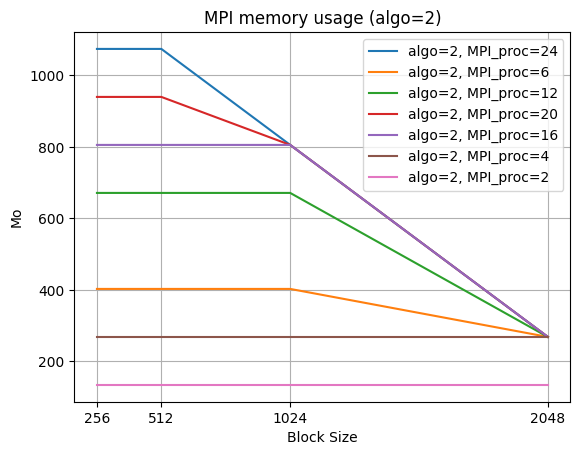

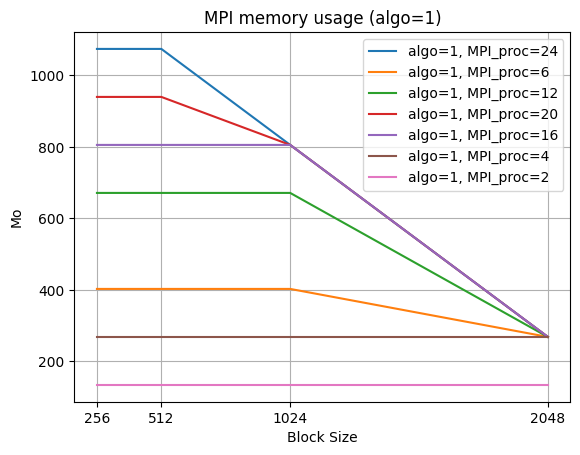

In [53]:
plt.figure()
for algo in data["algo"].unique():
    plt.grid(True)
    plt.xlabel('Block Size')
    plt.ylabel('Mo')
    plt.xticks(data["nb"].unique())
    for t in data["thread"].unique():
        tmp = data.loc[(data["algo"] == algo) & (data["thread"]==t)]
        tmp = tmp.sort_values(["nb"])
        plt.plot(tmp["nb"], tmp["send"], label="algo={}, MPI_proc={}".format(algo, t))
    plt.title("MPI memory usage (algo={})".format(algo))
    plt.legend()
    plt.show()


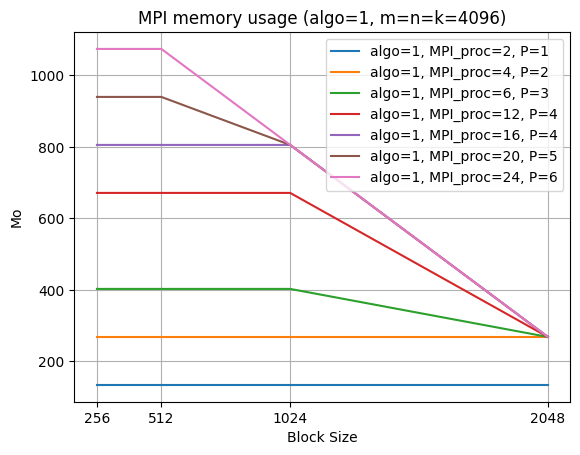

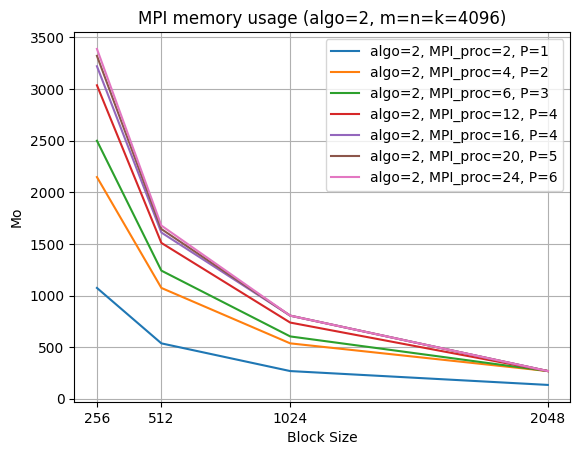

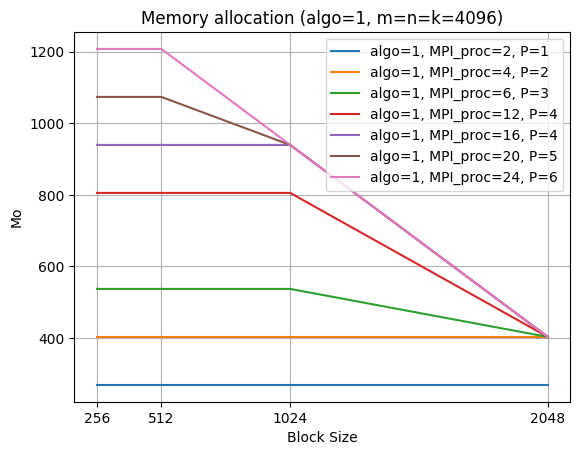

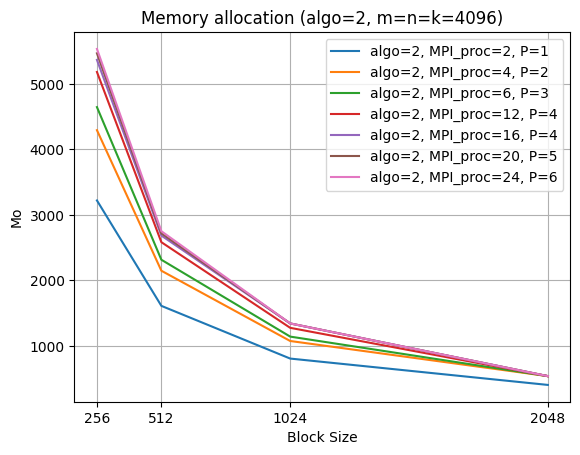

In [54]:
dirName = "commRes3"
parseOut = {}
for f in os.listdir(dirName):
    info = f.split("_")
    try:
        matSize = int(info[0])
    except:
        continue
    bSize = int(info[1])
    thread = int(info[2])
    algo = int(info[3])
    P = int(info[4].split(".")[0])
    key = (matSize, bSize, thread, algo, P)
    if key in parseOut:
        parseOut[key].append(dirName+"/" + f)
    else:
        parseOut[key] = [dirName+"/" + f]

data = []
for k in parseOut:
    matSize, bSize, thread, algo, P = k
    read, alloc = extractData(parseOut[k], matSize)
    data.append([matSize, bSize, thread, algo, read, alloc, P])

data = pandas.DataFrame(data, columns=["matrixSize", "nb", "thread", "algo", "send", "alloc", "P"])
data = data.sort_values(["algo", "thread"])

plt.figure()
for algo in data["algo"].unique():
    plt.grid(True)
    plt.xlabel('Block Size')
    plt.ylabel('Mo')
    plt.xticks(data["nb"].unique())
    for t in data["thread"].unique():
        tmp = data.loc[(data["algo"] == algo) & (data["thread"]==t)]
        tmp = tmp.sort_values(["nb"])
        plt.plot(tmp["nb"], tmp["send"], label="algo={}, MPI_proc={}, P={}".format(algo, t, tmp["P"].unique()[0]))
    plt.title("MPI memory usage (algo={}, m=n=k={})".format(algo,data["matrixSize"].unique()[0]))
    plt.legend()
    plt.show()

for algo in data["algo"].unique():
    plt.grid(True)
    plt.xlabel('Block Size')
    plt.ylabel('Mo')
    plt.xticks(data["nb"].unique())
    for t in data["thread"].unique():
        tmp = data.loc[(data["algo"] == algo) & (data["thread"]==t)]
        tmp = tmp.sort_values(["nb"])
        plt.plot(tmp["nb"], tmp["alloc"], label="algo={}, MPI_proc={}, P={}".format(algo, t, tmp["P"].unique()[0]))
    plt.title("Memory allocation (algo={}, m=n=k={})".format(algo,data["matrixSize"].unique()[0]))
    plt.legend()
    plt.show()
    

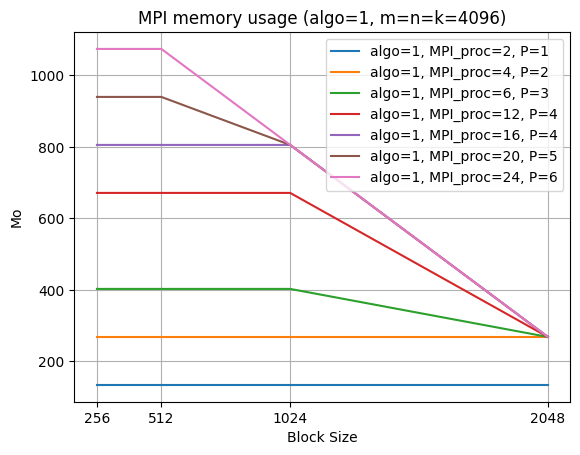

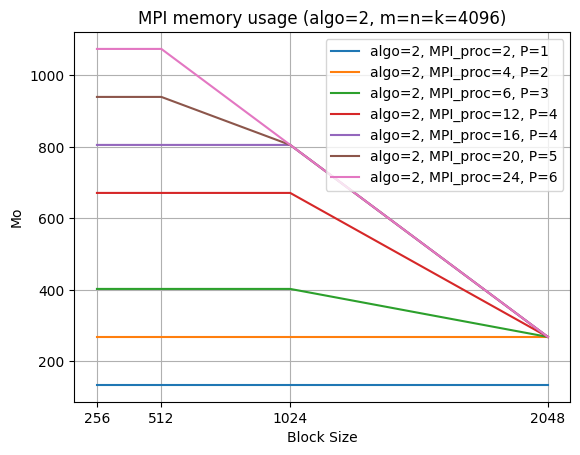

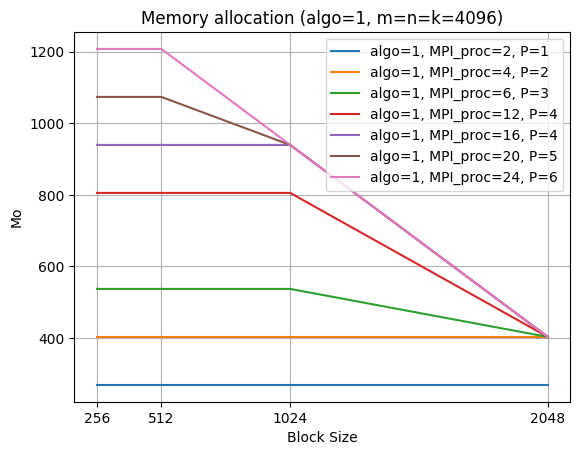

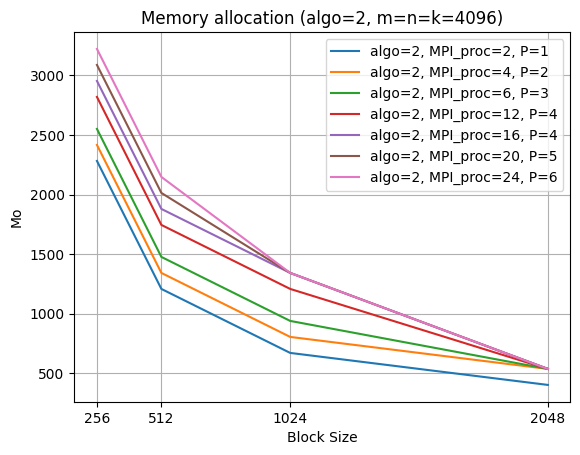

In [55]:
dirName = "commRes4"
parseOut = {}
for f in os.listdir(dirName):
    info = f.split("_")
    try:
        matSize = int(info[0])
    except:
        continue
    bSize = int(info[1])
    thread = int(info[2])
    algo = int(info[3])
    P = int(info[4].split(".")[0])
    key = (matSize, bSize, thread, algo, P)
    if key in parseOut:
        parseOut[key].append(dirName+"/" + f)
    else:
        parseOut[key] = [dirName+"/" + f]

data = []
for k in parseOut:
    matSize, bSize, thread, algo, P = k
    read, alloc = extractData(parseOut[k], matSize)
    data.append([matSize, bSize, thread, algo, read, alloc, P])

data = pandas.DataFrame(data, columns=["matrixSize", "nb", "thread", "algo", "send", "alloc", "P"])
data = data.sort_values(["algo", "thread"])

plt.figure()
for algo in data["algo"].unique():
    plt.grid(True)
    plt.xlabel('Block Size')
    plt.ylabel('Mo')
    plt.xticks(data["nb"].unique())
    for t in data["thread"].unique():
        tmp = data.loc[(data["algo"] == algo) & (data["thread"]==t)]
        tmp = tmp.sort_values(["nb"])
        plt.plot(tmp["nb"], tmp["send"], label="algo={}, MPI_proc={}, P={}".format(algo, t, tmp["P"].unique()[0]))
    plt.title("MPI memory usage (algo={}, m=n=k={})".format(algo,data["matrixSize"].unique()[0]))
    plt.legend()
    plt.show()

for algo in data["algo"].unique():
    plt.grid(True)
    plt.xlabel('Block Size')
    plt.ylabel('Mo')
    plt.xticks(data["nb"].unique())
    for t in data["thread"].unique():
        tmp = data.loc[(data["algo"] == algo) & (data["thread"]==t)]
        tmp = tmp.sort_values(["nb"])
        plt.plot(tmp["nb"], tmp["alloc"], label="algo={}, MPI_proc={}, P={}".format(algo, t, tmp["P"].unique()[0]))
    plt.title("Memory allocation (algo={}, m=n=k={})".format(algo,data["matrixSize"].unique()[0]))
    plt.legend()
    plt.show()
    